In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

In [46]:
df = pd.read_csv("data/airbnb_hw.csv")
print(df.head())

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

In [47]:
print(df.columns)
df.shape

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


(30478, 13)

In [48]:
df['Price'] = df['Price'].astype(str).str.replace(',', '')
df['Price']=df['Price'].astype(float)
df = df.rename(columns={'Neighbourhood ': 'Neighbourhood'})

In [49]:
print(df['Property Type'].unique())
print(df['Room Type'].unique())
print(df['Beds'].unique())
print(df['Neighbourhood'].unique())

['Apartment' 'House' 'Other' 'Bed & Breakfast' 'Loft' 'Condominium'
 'Townhouse' nan 'Dorm' 'Boat' 'Cabin' 'Villa' 'Bungalow' 'Camper/RV'
 'Treehouse' 'Tent' 'Hut' 'Lighthouse' 'Chalet' 'Castle']
['Entire home/apt' 'Private room' 'Shared room']
[ 1.  3.  2.  4.  5. nan  6. 10.  7.  8. 12.  0. 16.  9. 11.]
['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


In [50]:
df['Host Since'] = pd.to_datetime(df['Host Since'],errors = 'coerce')
df['Host Since'] = df['Host Since'].fillna(df['Host Since'].min())
df['Host Since_ordinal'] = df['Host Since'].apply(lambda x: x.toordinal())

In [51]:
numeric_vars = ['Beds', 'Number Of Reviews', 'Host Since_ordinal']
df = df.dropna(subset=numeric_vars + ['Price'])
cat_vars = ['Property Type', 'Room Type', 'Neighbourhood']
df_dummies = pd.get_dummies(df[cat_vars], drop_first=True)

# Combine numeric + dummy columns
X = pd.concat([df[numeric_vars], df_dummies], axis=1)
y = df['Price']

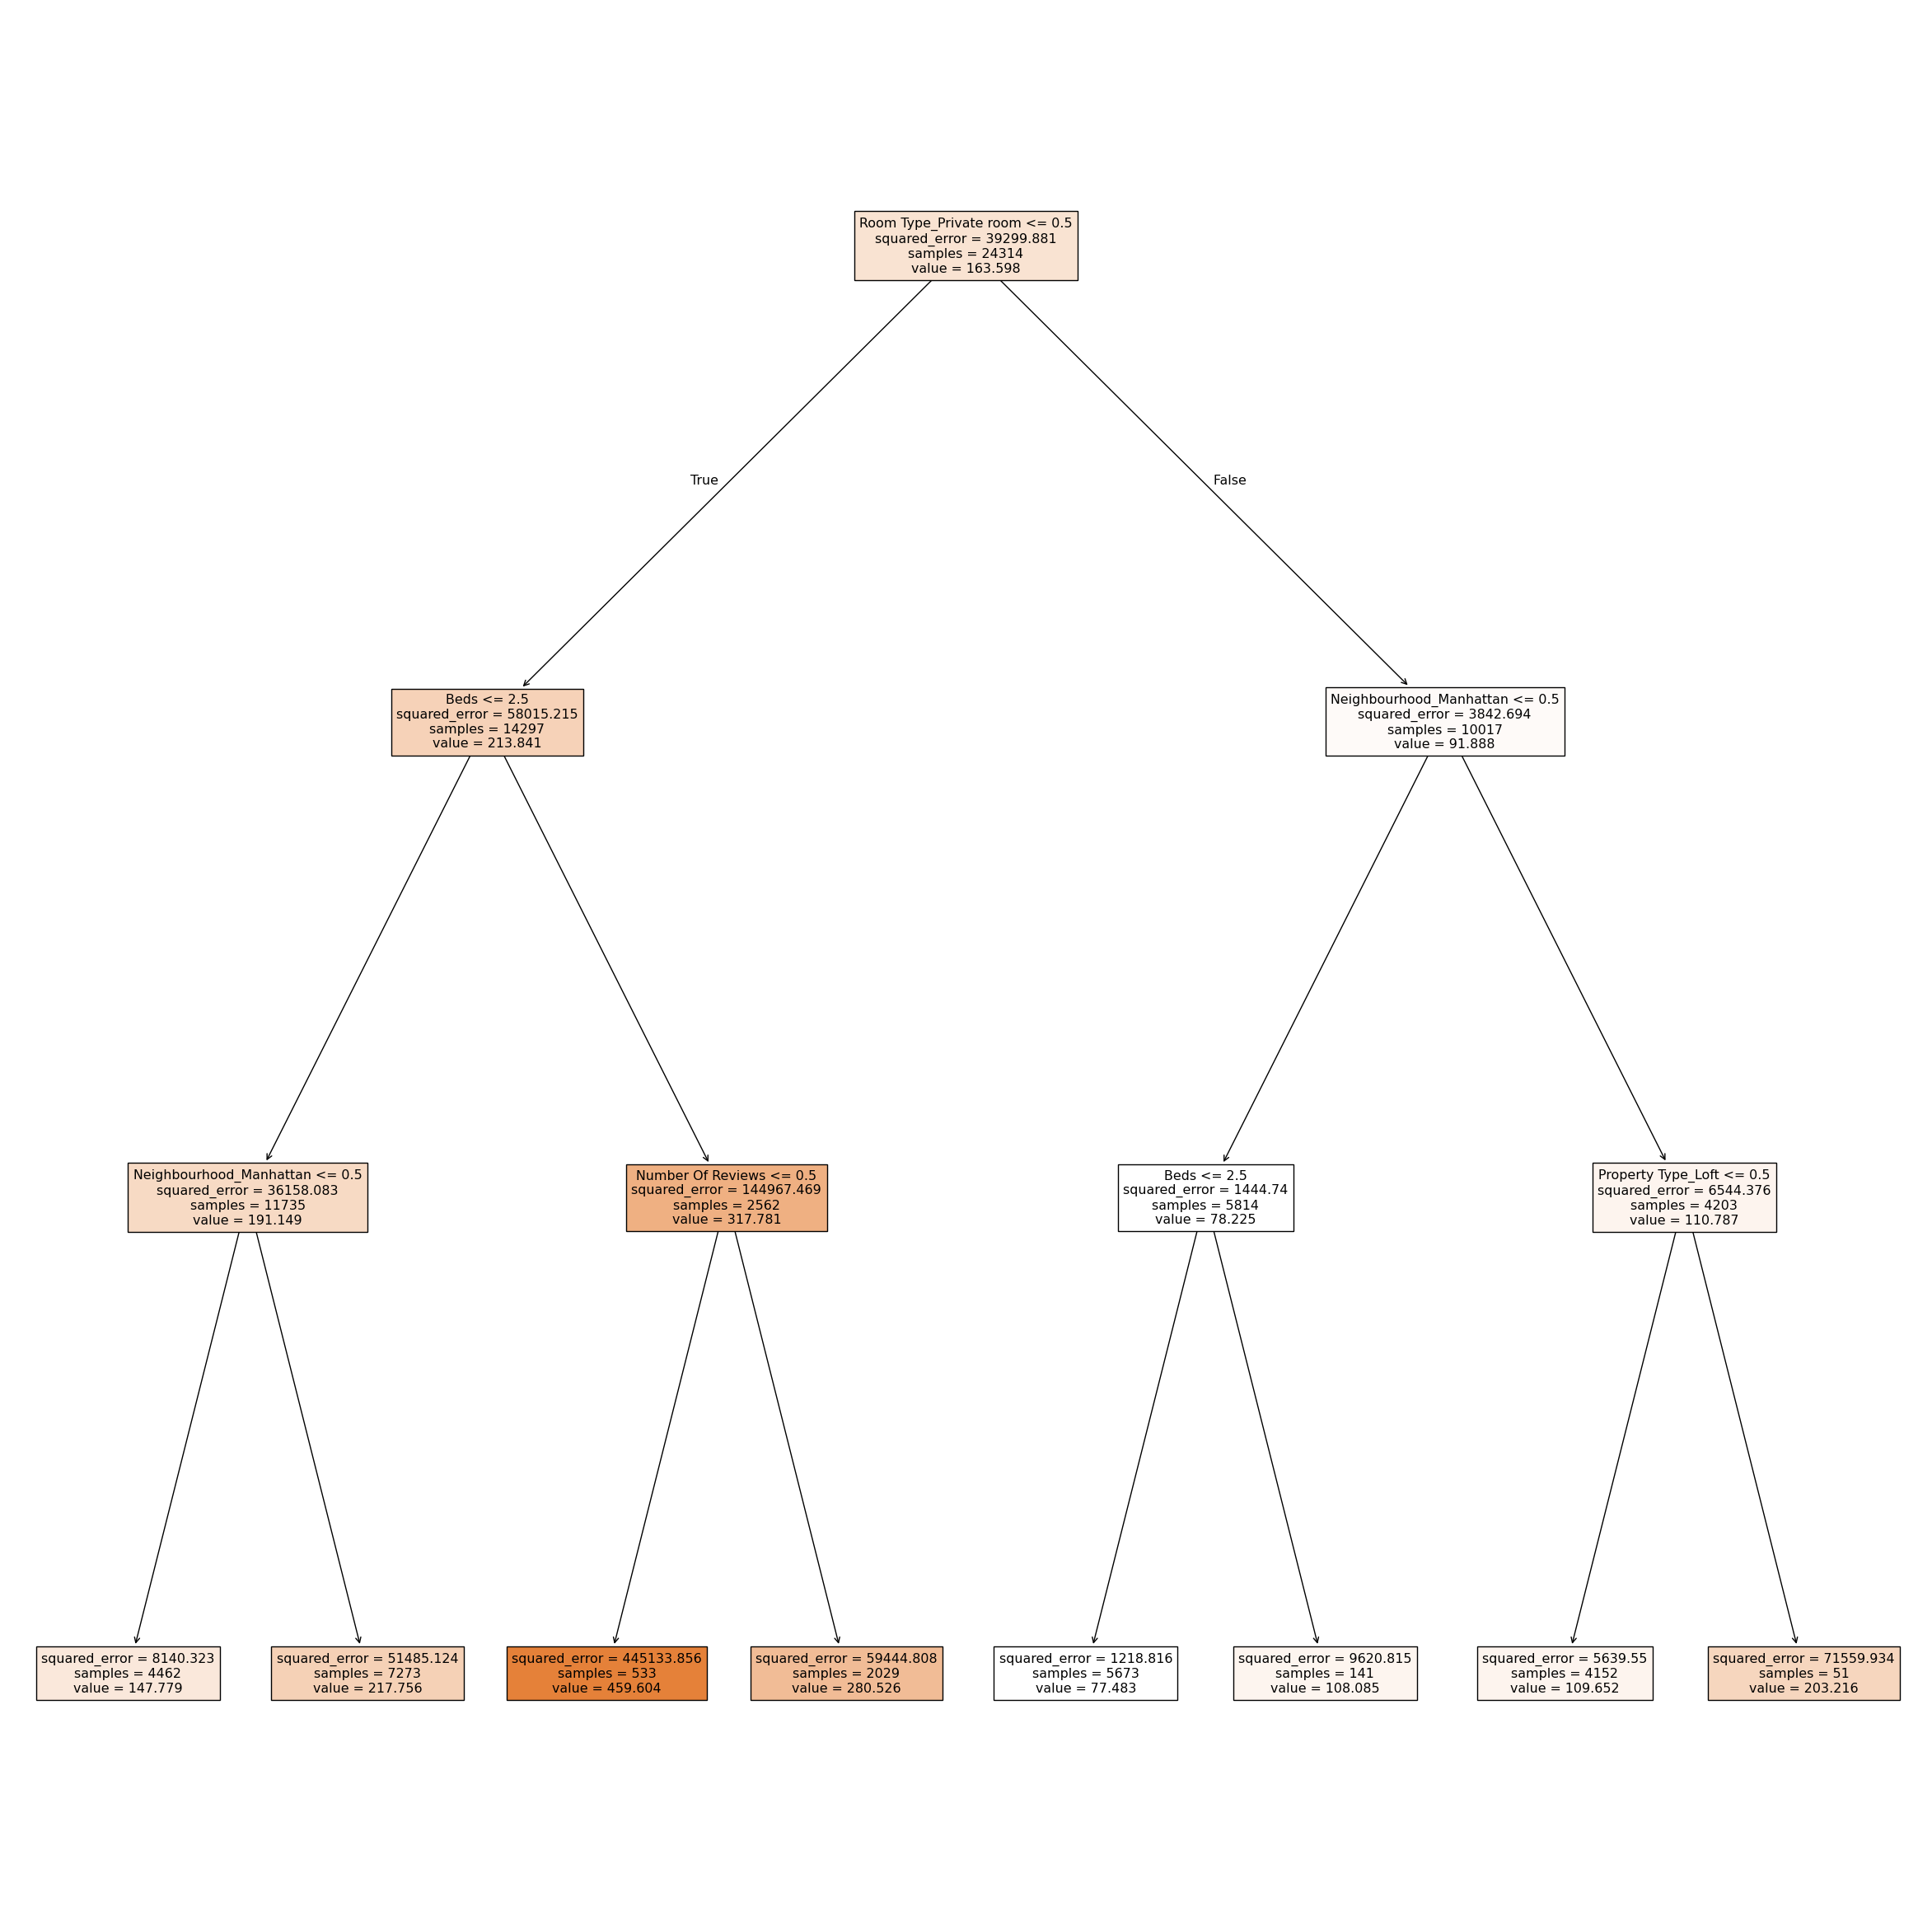

In [52]:
# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

# Fit decision tree:
cart = DecisionTreeRegressor(max_depth = 3) # Create a regression object
cart = cart.fit(X_train, y_train) # Fit the regression

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

# Visualize results:
plt.figure(figsize=(30,30))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

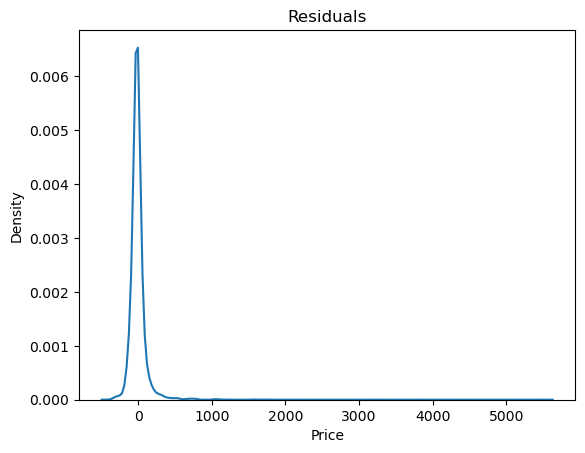

Rsq:  0.19028771516991894
RMSE:  173.0499064771674


In [53]:
## Residuals, Rsq, RMSE
e = y_test - y_hat
sns.kdeplot(e).set(title='Residuals') # Notice the residuals aren't centered around zero
plt.show()

rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq)
print('RMSE: ', RMSE)

In [67]:
def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

df_dummies = pd.get_dummies(
    df[['Property Type', 'Room Type', 'Neighbourhood']],
    drop_first=True
)

numeric_vars = ['Beds', 'Number Of Reviews', 'Host Since_ordinal']


df['(Intercept)'] = 1
X = pd.concat([df[numeric_vars], df_dummies, df['(Intercept)']], axis=1)
X = X.astype(float)
y = df['Price']
df['(Intercept)'] = 1
dummy_vars = [c for c in df.columns if c.startswith('Property Type_') 
                                   or c.startswith('Room Type_') 
                                   or c.startswith('Neighbourhood_')]
X = df[numeric_vars + dummy_vars+['(Intercept)']].astype(float)

y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

reg = mlr(X_train,y_train)
y_pred3 = X_test @ reg['b']

rsq_test = 1 - np.sum((y_test - y_pred3)**2) / np.sum((y_test - np.mean(y_test))**2)


print('Test R^2:', rsq_test3)
print("Train R^2:", reg['rsq'])

print('MLR coefficients: ', reg['b']) # Same values!

Test R^2: 0.11354041673315007
Train R^2: 0.1027603912868984
MLR coefficients:  [ 6.22242519e+01 -6.08939058e-01 -1.55079770e-02  1.14749097e+04]


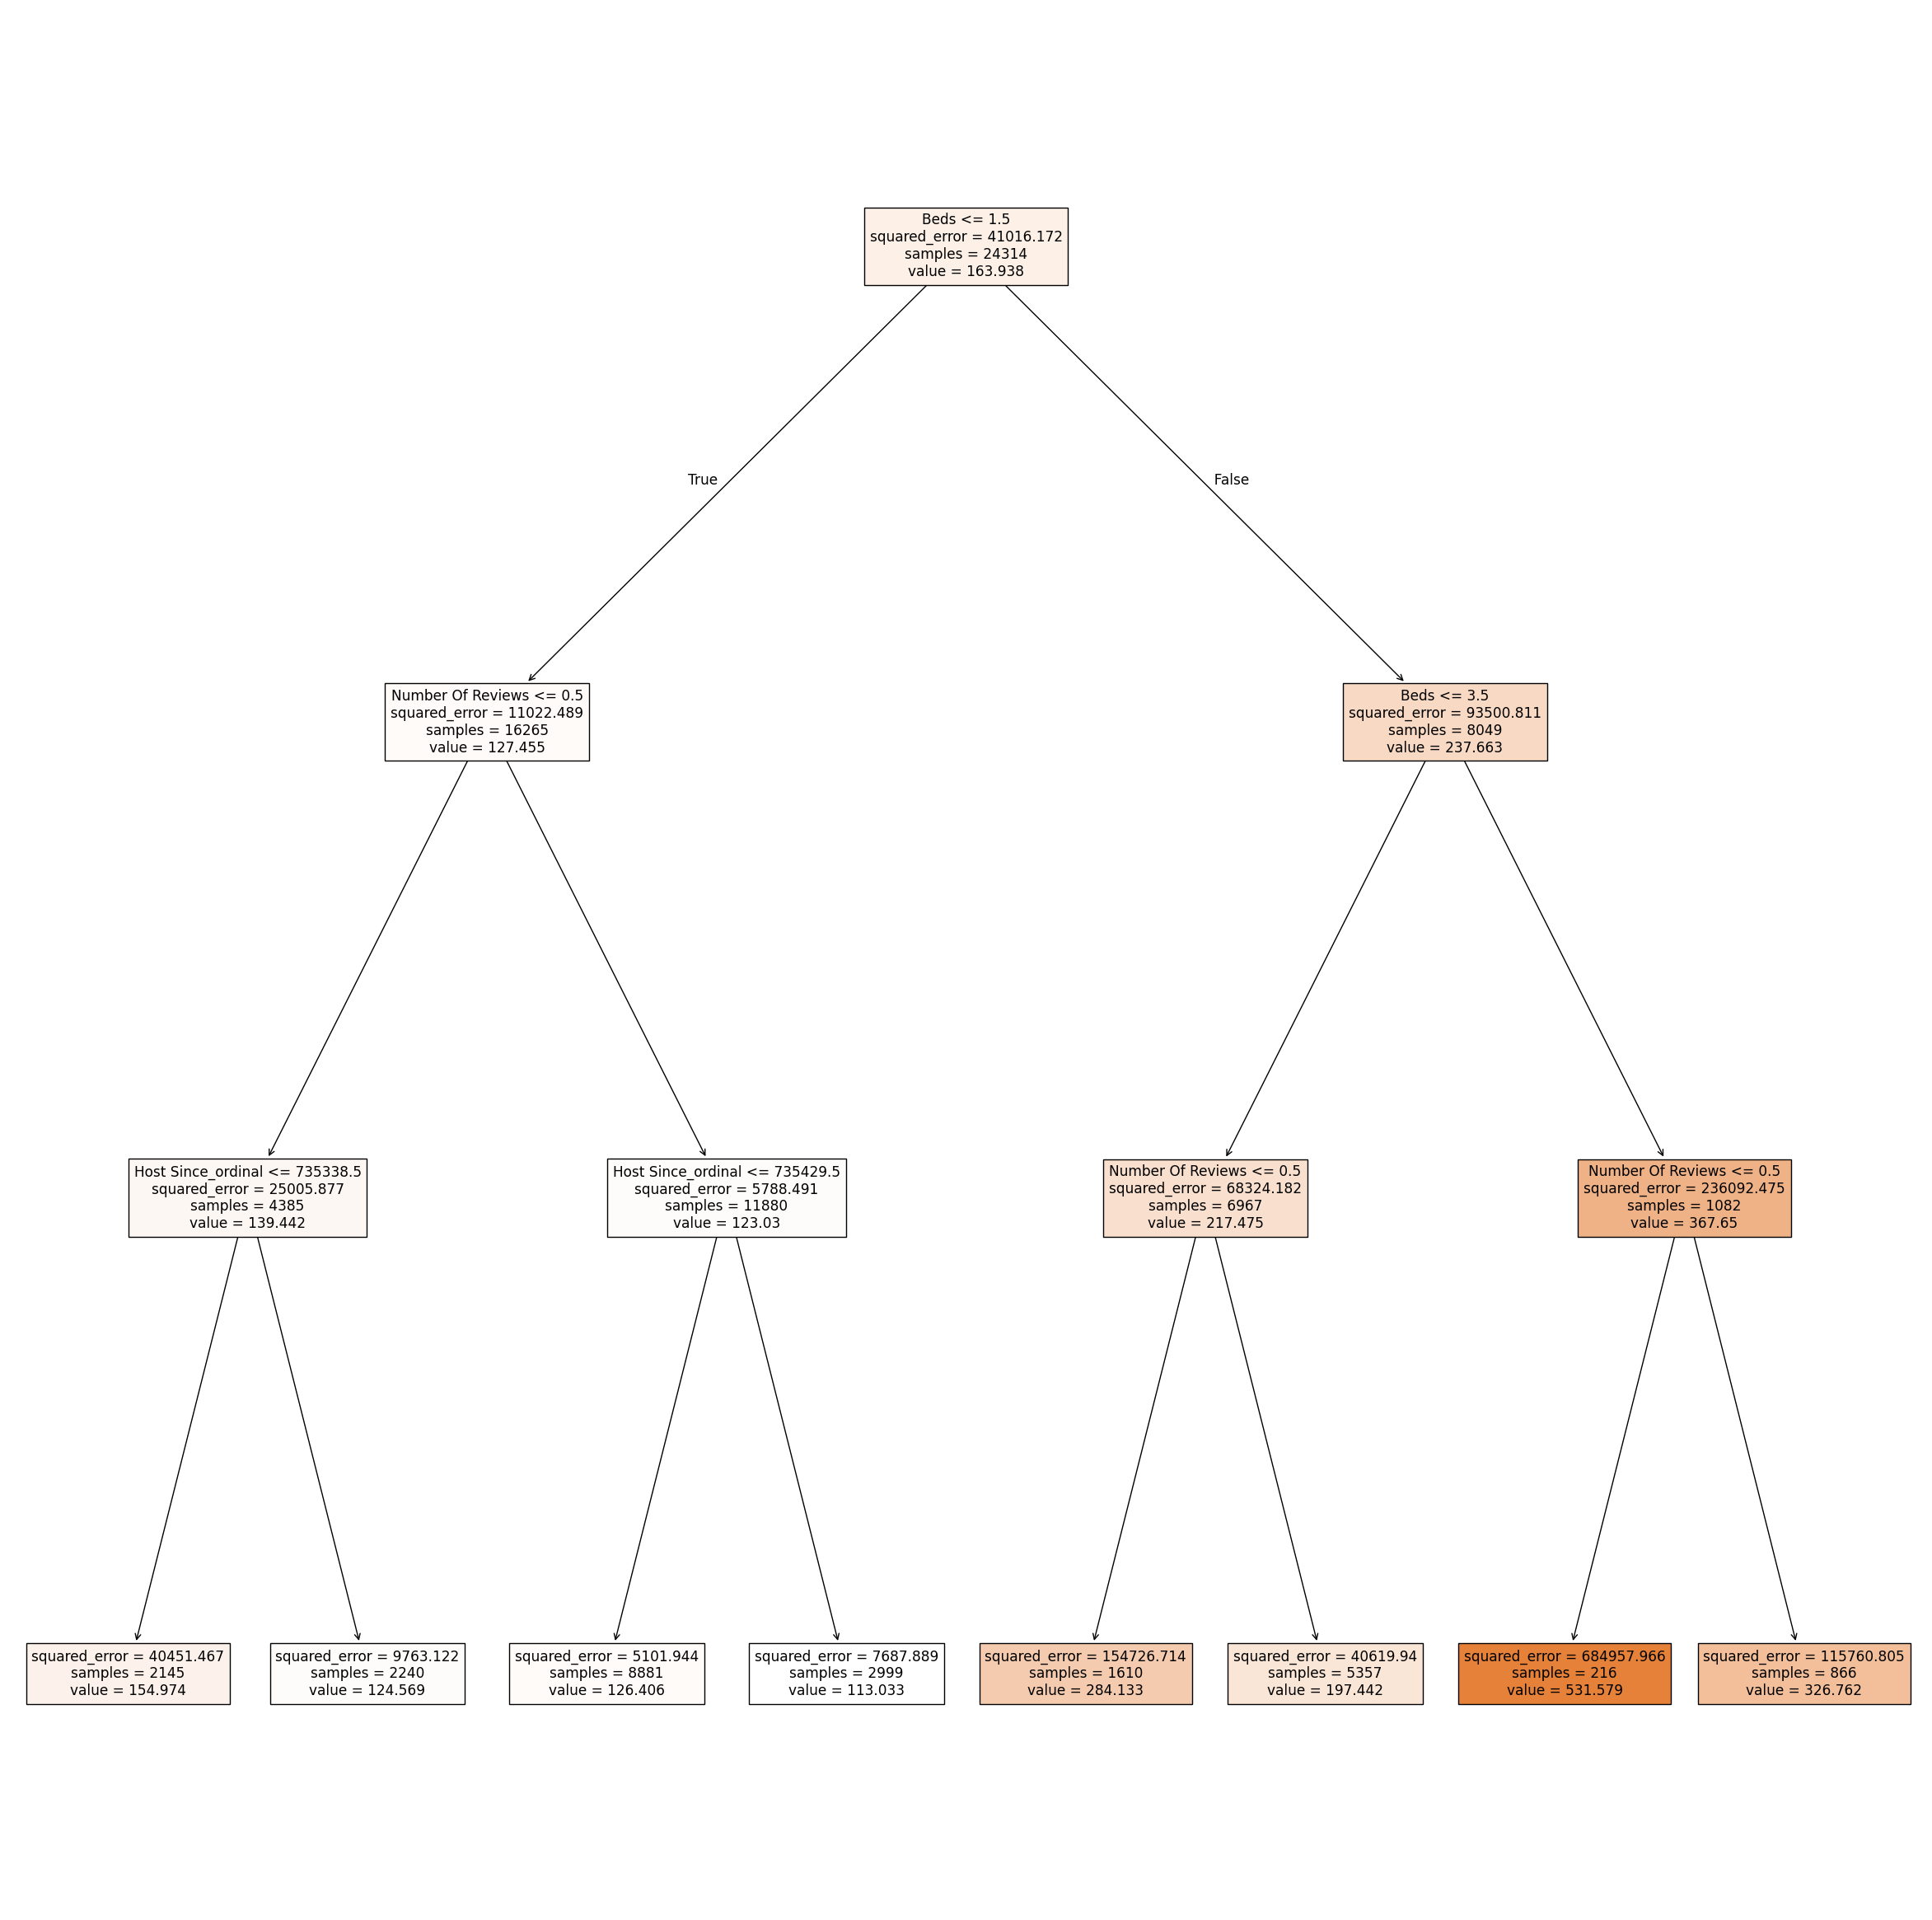

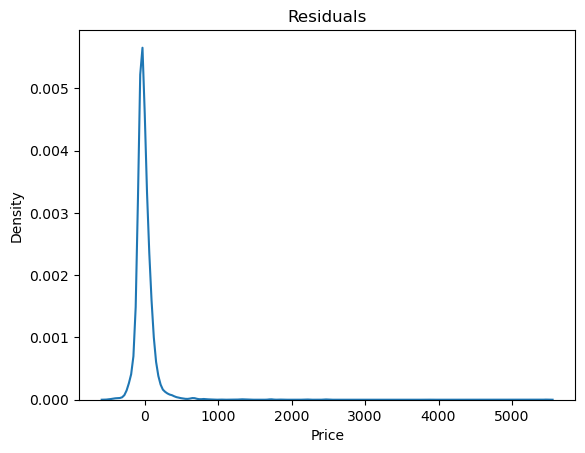

Rsq:  0.11400705461192562
RMSE:  163.35965440073102


In [68]:
# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=50)

# Fit decision tree:
cart = DecisionTreeRegressor(max_depth = 3) # Create a regression object
cart = cart.fit(X_train, y_train) # Fit the regression

## Make Predictions on the Test Set
y_hat1 = cart.predict(X_test)

# Visualize results:
plt.figure(figsize=(30,30))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

## Residuals, Rsq, RMSE
e = y_test - y_hat1
sns.kdeplot(e).set(title='Residuals') # Notice the residuals aren't centered around zero
plt.show()

rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq)
print('RMSE: ', RMSE)

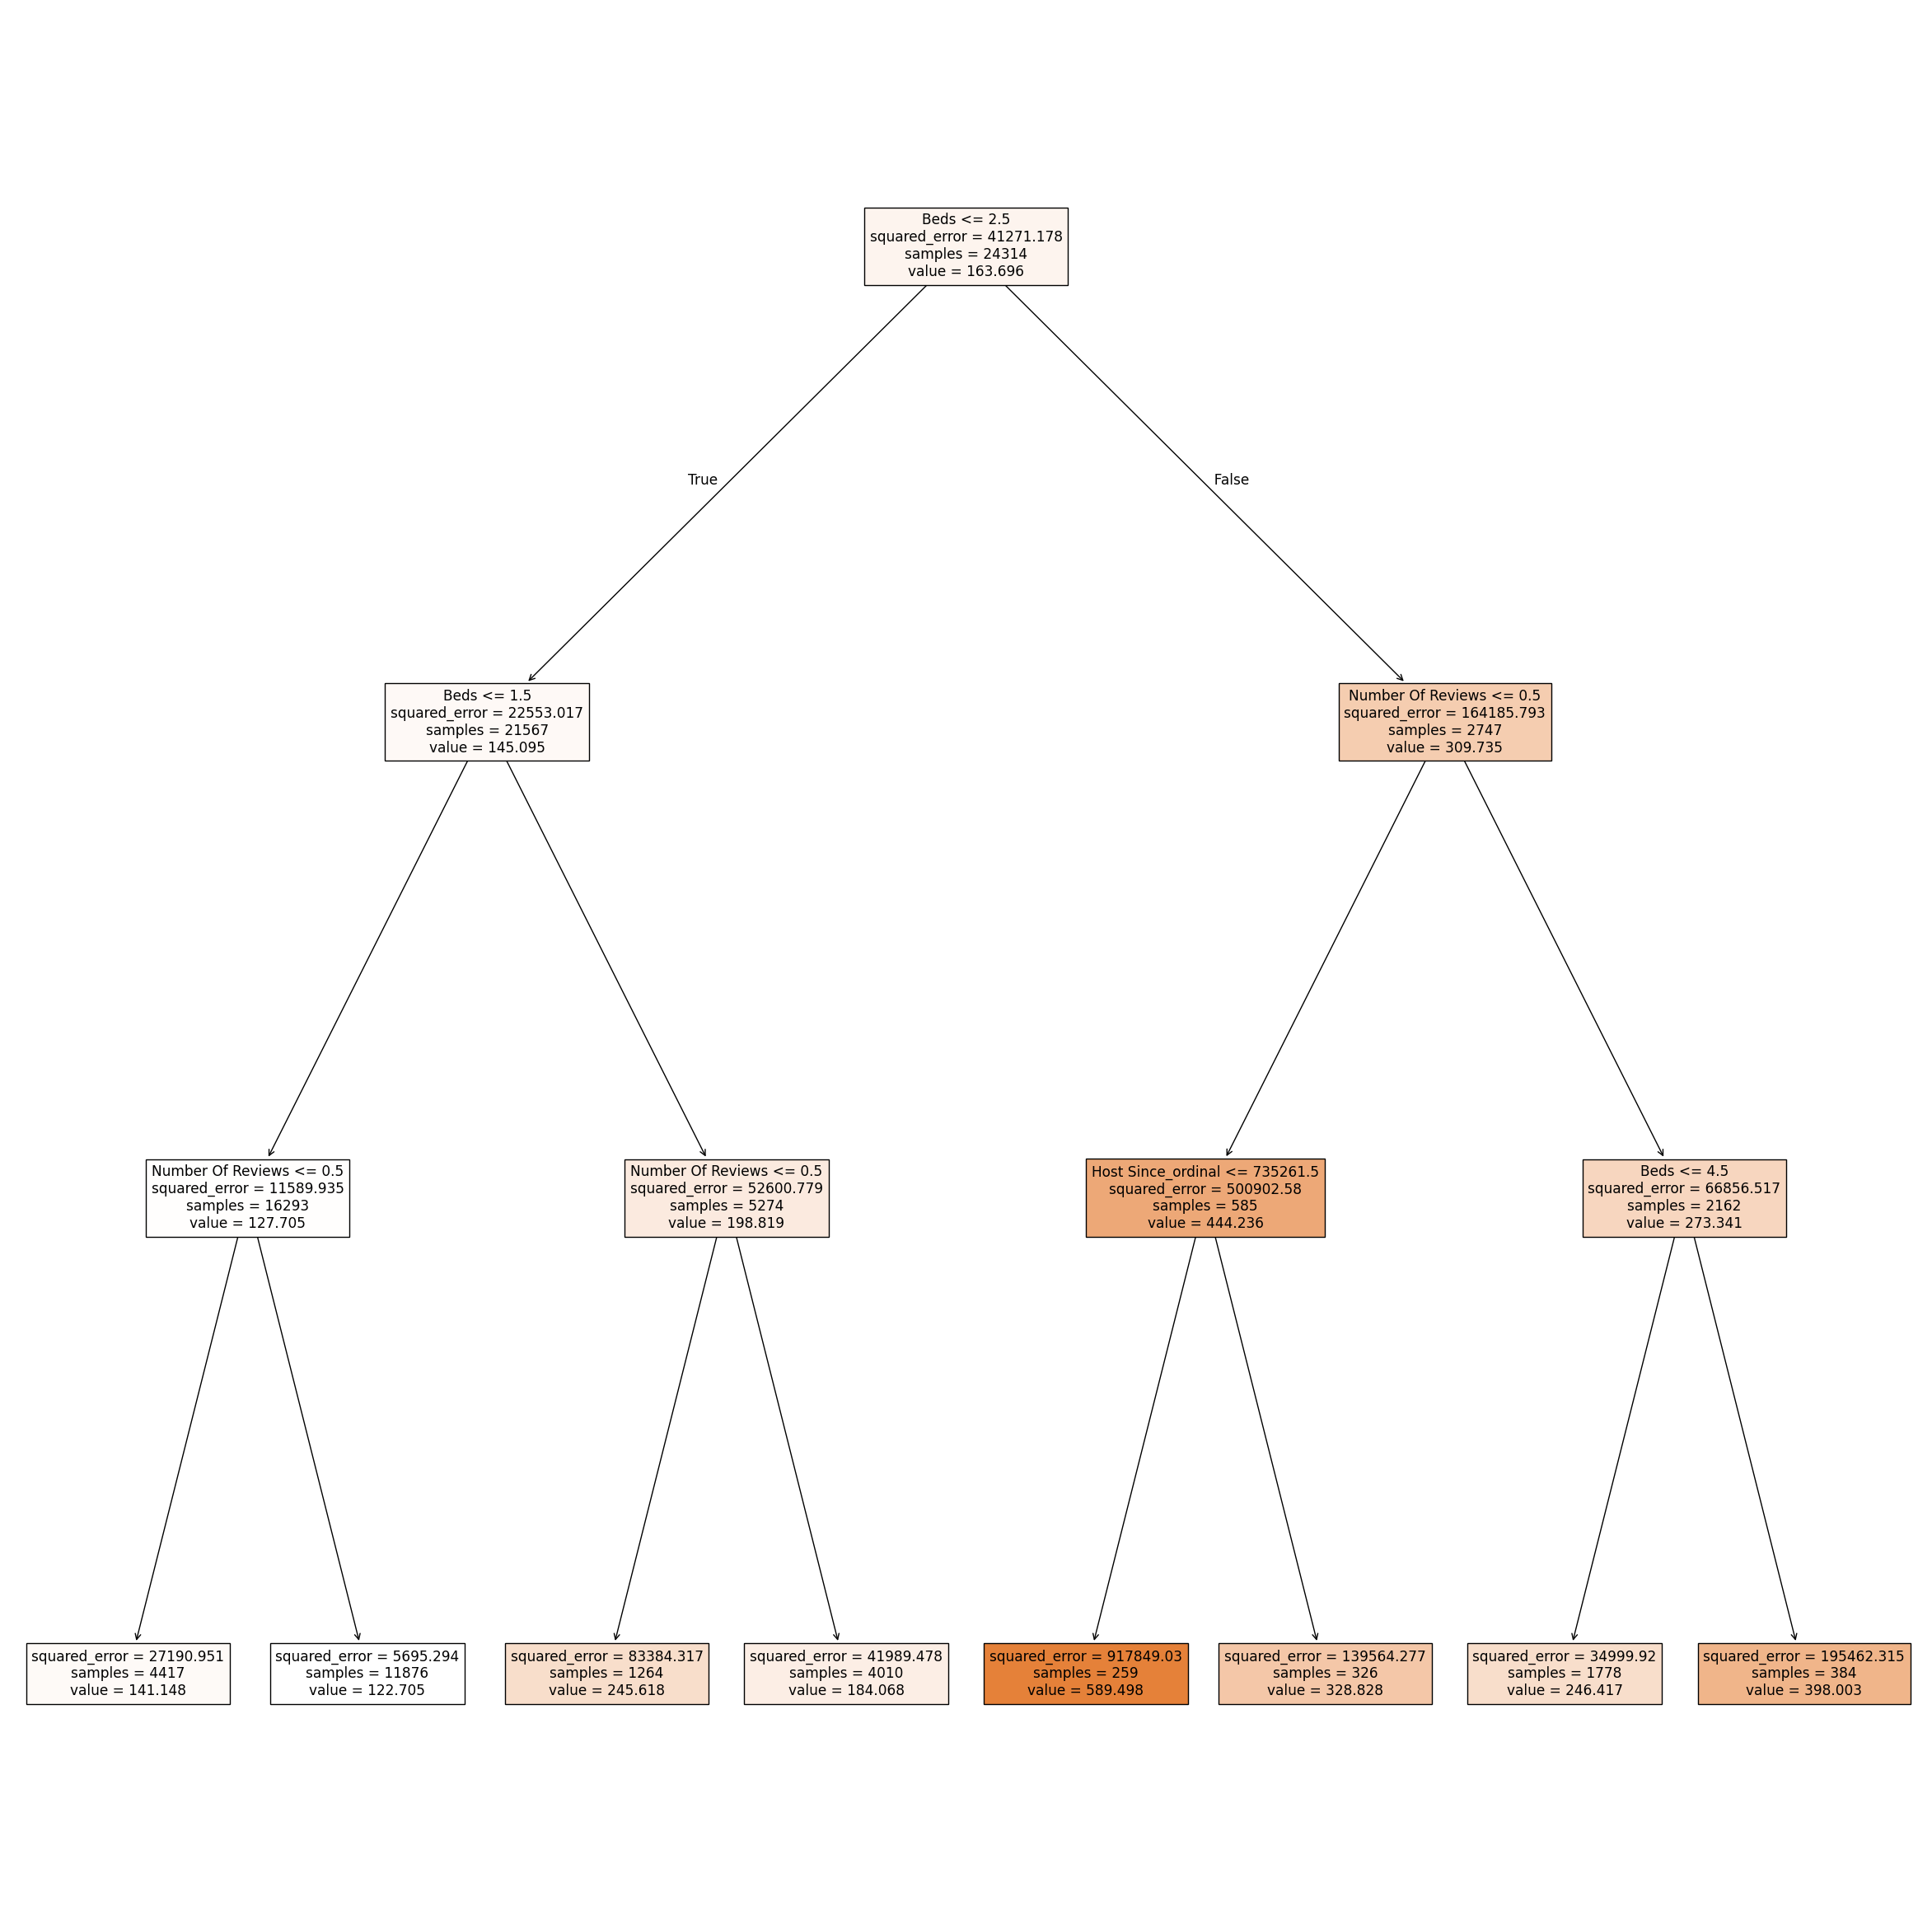

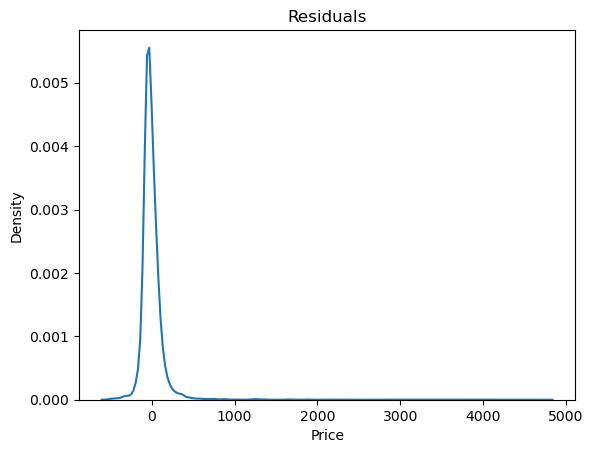

Rsq:  0.1251323688779057
RMSE:  159.55626111319944


In [69]:
# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=25)

# Fit decision tree:
cart = DecisionTreeRegressor(max_depth = 3) # Create a regression object
cart = cart.fit(X_train, y_train) # Fit the regression

## Make Predictions on the Test Set
y_hat2 = cart.predict(X_test)

# Visualize results:
plt.figure(figsize=(30,30))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

## Residuals, Rsq, RMSE
e = y_test - y_hat2
sns.kdeplot(e).set(title='Residuals') # Notice the residuals aren't centered around zero
plt.show()

rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq)
print('RMSE: ', RMSE)

In [70]:
def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

df_dummies = pd.get_dummies(
    df[['Property Type', 'Room Type', 'Neighbourhood']],
    drop_first=True
)

numeric_vars = ['Beds', 'Number Of Reviews', 'Host Since_ordinal']


df['(Intercept)'] = 1
X = pd.concat([df[numeric_vars], df_dummies, df['(Intercept)']], axis=1)
X = X.astype(float)
y = df['Price']
df['(Intercept)'] = 1
dummy_vars = [c for c in df.columns if c.startswith('Property Type_') 
                                   or c.startswith('Room Type_') 
                                   or c.startswith('Neighbourhood_')]
X = df[numeric_vars + dummy_vars+['(Intercept)']].astype(float)

y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=50)

reg = mlr(X_train,y_train)
y_pred4 = X_test @ reg['b']

rsq_test = 1 - np.sum((y_test - y_pred4)**2) / np.sum((y_test - np.mean(y_test))**2)


print('Test R^2:', rsq_test)
print("Train R^2:", reg['rsq'])

print('MLR coefficients: ', reg['b']) # Same values!

Test R^2: 0.12092640382338815
Train R^2: 0.10177613930959295
MLR coefficients:  [ 6.31298771e+01 -6.28865213e-01 -1.55218712e-02  1.14842984e+04]


In [71]:
df_dummies = pd.get_dummies(
    df[['Property Type', 'Room Type', 'Neighbourhood']],
    drop_first=True
)

numeric_vars = ['Beds', 'Number Of Reviews', 'Host Since_ordinal']


df['(Intercept)'] = 1
X = pd.concat([df[numeric_vars], df_dummies, df['(Intercept)']], axis=1)
X = X.astype(float)
y = df['Price']
df['(Intercept)'] = 1
dummy_vars = [c for c in df.columns if c.startswith('Property Type_') 
                                   or c.startswith('Room Type_') 
                                   or c.startswith('Neighbourhood_')]
X = df[numeric_vars + dummy_vars+['(Intercept)']].astype(float)

y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=25)

reg = mlr(X_train,y_train)
y_pred5 = X_test @ reg['b']

rsq_test5 = 1 - np.sum((y_test - y_pred5)**2) / np.sum((y_test - np.mean(y_test))**2)


print('Test R^2:', rsq_test)
print("Train R^2:", reg['rsq'])

print('MLR coefficients: ', reg['b']) # Same values!

Test R^2: 0.12092640382338815
Train R^2: 0.10057836052346936
MLR coefficients:  [ 6.22463865e+01 -6.32944946e-01 -1.58371223e-02  1.17171246e+04]


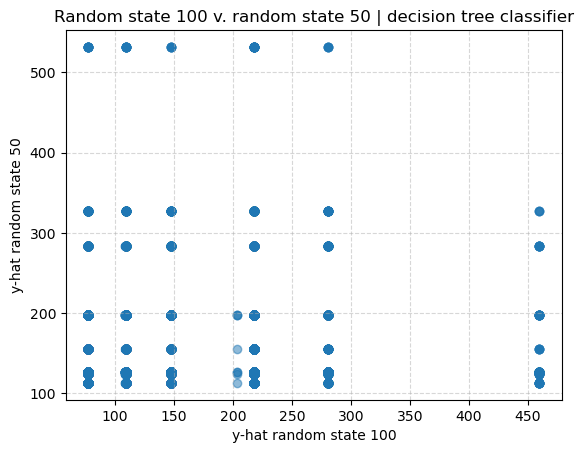

In [72]:
plt.scatter(y_hat, y_hat1, alpha=0.5)

plt.xlabel("y-hat random state 100")
plt.ylabel('y-hat random state 50')
plt.title("Random state 100 v. random state 50 | decision tree classifier")

# Show grid
plt.grid(True, linestyle='--', alpha=0.5)


# Display the plot
plt.show()

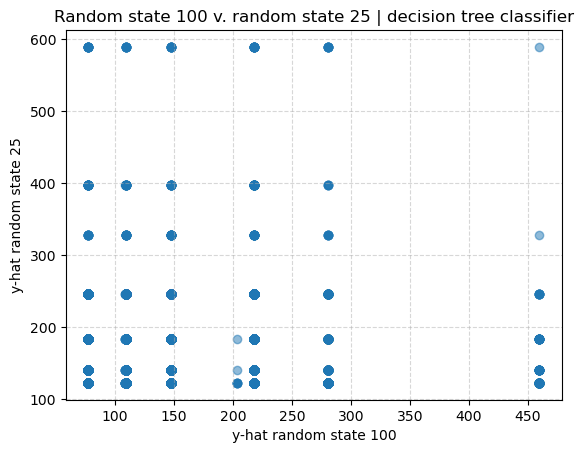

In [73]:
plt.scatter(y_hat, y_hat2, alpha=0.5)

plt.xlabel("y-hat random state 100")
plt.ylabel('y-hat random state 25')
plt.title("Random state 100 v. random state 25 | decision tree classifier")

# Show grid
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

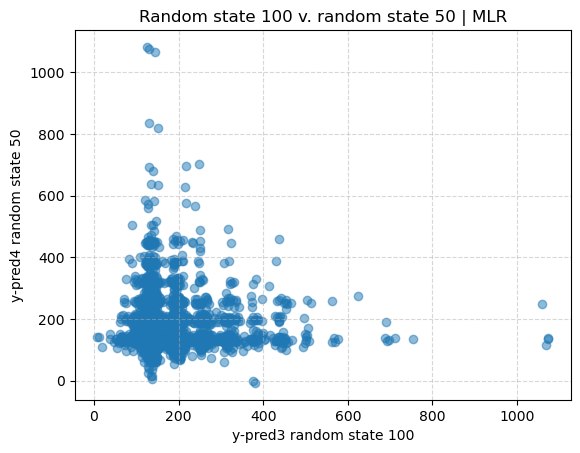

In [74]:
plt.scatter(y_pred3, y_pred4, alpha=0.5)

plt.xlabel("y-pred3 random state 100")
plt.ylabel('y-pred4 random state 50')
plt.title("Random state 100 v. random state 50 | MLR")

# Show grid
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

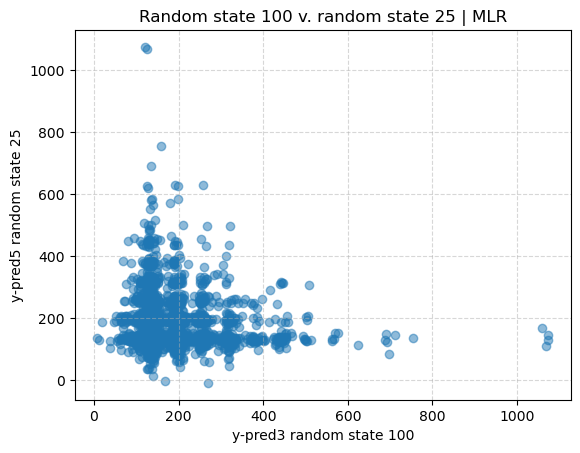

In [75]:
plt.scatter(y_pred3, y_pred5, alpha=0.5)

plt.xlabel("y-pred3 random state 100")
plt.ylabel('y-pred5 random state 25')
plt.title("Random state 100 v. random state 25 | MLR")

# Show grid
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

In [76]:
corr1 = np.corrcoef(y_pred3, y_pred4)[0, 1]
corr2 = np.corrcoef(y_pred3, y_pred5)[0, 1]
corr3 = np.corrcoef(y_pred4, y_pred5)[0, 1]

print("Correlation model1–model2:", corr1)
print("Correlation model1–model3:", corr2)
print("Correlation model2–model3:", corr3)


Correlation model1–model2: 0.003083627265878166
Correlation model1–model3: -0.01654399888310167
Correlation model2–model3: -0.015222356480995028


In [77]:
corr11 = np.corrcoef(y_hat, y_hat1)[0, 1]
corr22 = np.corrcoef(y_hat, y_hat2)[0, 1]
corr33 = np.corrcoef(y_hat1, y_hat2)[0, 1]

print("Correlation model1–model2:", corr11)
print("Correlation model1–model3:", corr22)
print("Correlation model2–model3:", corr33)


Correlation model1–model2: -0.010266049827499077
Correlation model1–model3: -0.008330921362662166
Correlation model2–model3: -0.0096857406012529


In [85]:
def slr(x, y): 
    """ Single Linear Regression Function. """
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar, y-y_bar) / np.inner(x-x_bar, x-x_bar)
    b0 = y_bar - b1*x_bar
    y_hat_ = b0 + b1*x
    residuals = y - y_hat_
    SSE = np.sum(residuals**2)
    SST = np.sum((y - y_bar)**2)
    rsq = 1 - SSE/SST
    return({'b0': b0, 'b1': b1, 'y_hat': y_hat_, 'residuals': residuals, 'rsq': rsq})
# Run regressions for tree classifications
reg1 = slr(y_hat, y_hat1)
reg2 = slr(y_hat, y_hat2)
reg3 = slr(y_hat1, y_hat2)

print('Tree classification between seed of 100 and 50: y intercept:', reg1['b0'], 
      "slope:", reg1['b1'], "R^2:", reg1['rsq'])
print('Tree classification between seed of 100 and 25: y intercept:', reg2['b0'], 
      "slope:", reg2['b1'], "R^2:", reg2['rsq'])
print('Tree classification between seed of 25 and 50: y intercept:', reg3['b0'], 
      "slope:", reg3['b1'], "R^2:", reg3['rsq'])

# Run regressions for MLR predictions
reg4 = slr(y_pred3, y_pred4)
reg5 = slr(y_pred3, y_pred5)
reg6 = slr(y_pred5, y_pred4)

print('MLR between seed of 100 and 50: y intercept:', reg4['b0'], 
      "slope:", reg4['b1'], "R^2:", reg4['rsq'])
print('MLR between seed of 100 and 25: y intercept:', reg5['b0'], 
      "slope:", reg5['b1'], "R^2:", reg5['rsq'])
print('MLR between seed of 25 and 50: y intercept:', reg6['b0'], 
      "slope:", reg6['b1'], "R^2:", reg6['rsq'])

Tree classification between seed of 100 and 50: y intercept: 165.62176586367792 slope: -0.008904365996245866 R^2: 0.00010539177906065955
Tree classification between seed of 100 and 25: y intercept: 164.63961890647198 slope: -0.007539371287807075 R^2: 6.940425075074863e-05
Tree classification between seed of 25 and 50: y intercept: 165.07391341263664 slope: -0.010105906954899897 R^2: 9.38135709945831e-05
MLR between seed of 100 and 50: y intercept: 163.6760855516273 slope: 0.0031090302235172876 R^2: 0.830912798900964
MLR between seed of 100 and 25: y intercept: 166.2480311697027 slope: -0.01580469949396409 R^2: 0.8102495645573193
MLR between seed of 25 and 50: y intercept: 166.81503970342445 slope: -0.016065683404000265 R^2: 0.7995060789086059


In [ ]:
#3: For the classification trees, the test and train R^2 values changed more across the changing seed values (100 to 50 to 25) as compared to the multiple lienar regression models, where the R squared values did not change significantly as the seed values changed. Thus, the changes appear to be non-trival in the trees, but the MLR didn't vary nearly as much.

In [ ]:
#4: The scatterplots do appear pretty similar within their groups (in other words, the scatterplots in the MLR appear similar and the scatterplots in the decision tree classifier appear similar). None of the models are highly correlated, the correlations are super low.The decision tree model shows slopes of essentially zero, in addition to incredibly low R^2 values.This indicates that there is essentially no correlation among the trees. This is because tree models are more sensitive and less stable.

#The MLR model also shows slopes of essentially zero, but the R^2 values are closer to 1, indicating that while the low slopes are surprising, the different models are in fact much more correlated than the tree models. This is because MLR is far more stable than decision trees.

#The high y_intercept value is likely due to the Price target variable baseline. However, the most important metric across all three measures is the R^2, which shows high correlation among the MLR model variations, and not the decision tree models. 

#The intercepts are not close to zero, and the slopes are not close to 1, but the R^2 values for the MLR comparisons using simple linear regression are far closer to 1.

In [ ]:
#5 They both do appear to have similar predictions and coefficients across train test splits. But the multiple linear regression has a higher correlation between models when you run a simple linear regression.

In [ ]:
#6: Yes, this statement is true: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."
# This is true because small changes in data can lead the tree to look quite different. Decision trees make the best decision at each split so the steps can look very different but the goal is pretty similar because the data is is similar groups, so the predictions are similar to each other.